In [1]:
from pylab import *

# 1

In [2]:
m = 1.0
a = 1.0
h = 1.0
V0 = 100.0

z0 = np.sqrt(2.0*m*V0*a*a/(h**2))

N = 3000
z = linspace(0.0001,z0,N)

f1 = np.tan(z)
f2 = -1.0 / f1
f3 = sqrt((z0/z)**2 -1.0)

(-10, 10)

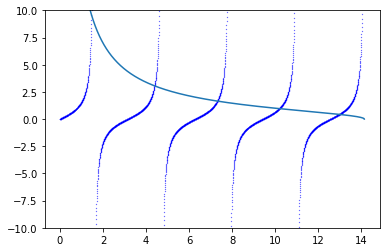

In [3]:
plot(z,f1,'b.',markersize=0.5)
plot(z,f3)
ylim(-10,10)

(-10, 10)

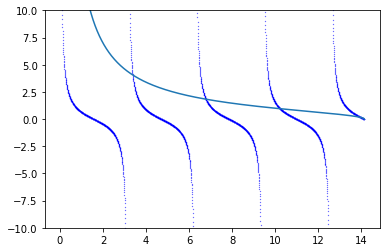

In [4]:
fz = 1/tan(z)
plot(z,fz,'b.',markersize=0.5)
plot(z,f3)
top = 10
ylim(-10,top)

Only one solution exists in the well!

# 2

In [5]:
Nz = 100
zeven = zeros(Nz)
count = 0
for i in range(0,N-1):
    if(f1[i]-f3[i])*(f1[i+1]-f3[i+1])<=0:
        if(f1[i]-f3[i]) < top:
            zeven[count] = z[i]
            count = count+1
        
zeven = zeven[0:count]
zeven

array([ 1.46664654,  4.39502404,  7.30925479, 10.19047645, 12.97267086])

# 3

In [6]:
Nz = 100
zodd = zeros(Nz)
count = 0
for i in range(0,N-1):
    if(f1[i]-f3[i])*(f1[i+1]-f3[i+1])<=0:
        if(f1[i]-f3[i]) < top:
            zodd[count] = z[i]
            count = count+1
        
zodd = zodd[0:count]
zodd

array([ 1.46664654,  4.39502404,  7.30925479, 10.19047645, 12.97267086])

Ah! The extra solution is because python believes the tangent and cotangent functions are continues, and counts crossings of the asymptotes to be solutions! This can be cleared by looking only before the asymptote.

# 4

In [7]:
def getE(val):
    return (h**2 * (val/a)**2)/(2*m)

In [8]:
Eev = []
for i in range(0,len(zeven)):
    Eev.append( getE(zeven[i]) )
print(Eev)
Eodd = []
for i in range(0,len(zodd)):
    Eodd.append( getE(zodd[i]) )
print(Eodd)

[1.0755260393466746, 9.658118163939987, 26.71260279640267, 51.92290517071403, 84.14509458523321]
[1.0755260393466746, 9.658118163939987, 26.71260279640267, 51.92290517071403, 84.14509458523321]


# 5

In [9]:
Nx = 3000
L = 2*a
x = linspace(-1.5*L,1.5*L,Nx)
dx = x[2]-x[1]

V = zeros(Nx)

for i in range(0,Nx):
    if abs(x[i])>a:
        V[i] = V0

H = zeros((Nx,Nx))

for i in range(0,Nx):
    if i>0:
        H[i,i-1] = -(h**2)/(2.0*m*(dx**2))
    if i <Nx-1:
        H[i,i+1] = -(h**2)/(2.0*m*(dx**2))
        
    H[i,i] = 2.0*(h**2)/(2.0*m*(dx**2)) + V[i]

In [10]:
egVals,egVects = eigh(H)

In [11]:
egVals[0:3]

array([1.0751914 , 4.2976343 , 9.65749367])

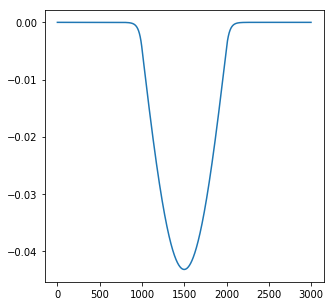

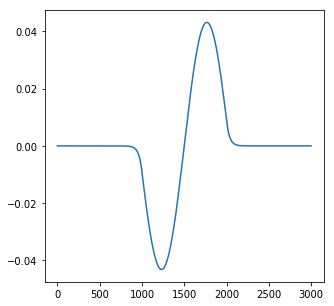

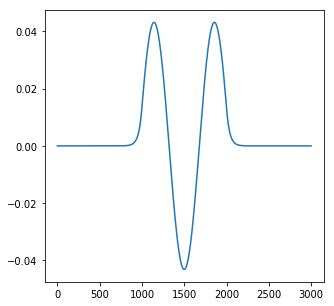

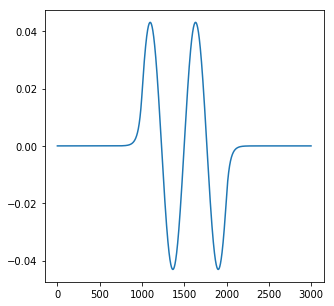

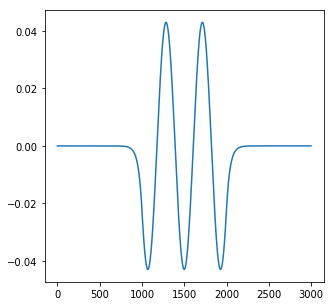

In [12]:
for i in range(0,5):
    figure(figsize=[5,5])
    plot(egVects[:,i])

For the 4th eigenvector, the boundaries don't go to 0! This seems to suggest that it's not a solution--it doesn't stay in the box.

# 7

The answers are consistent even with a much larger value of V0. 

# 8

In [13]:
Nx = 3000
No = 9
Vo = 1000
L = 1.0
x = linspace(0,L,Nx)

V = 0.5*Vo*(sign(cos(2*pi*x*No/L))+1.0)

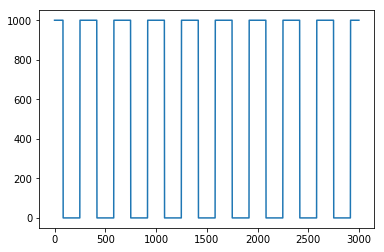

In [14]:
plot(V)

In [15]:
H = zeros((Nx,Nx))

for i in range(0,Nx):
    if i>0:
        H[i,i-1] = -(h**2)/(2.0*m*(dx**2))
    if i <Nx-1:
        H[i,i+1] = -(h**2)/(2.0*m*(dx**2))
        
    H[i,i] = 2.0*(h**2)/(2.0*m*(dx**2)) + V[i]

In [16]:
egVals,egVects = eigh(H)

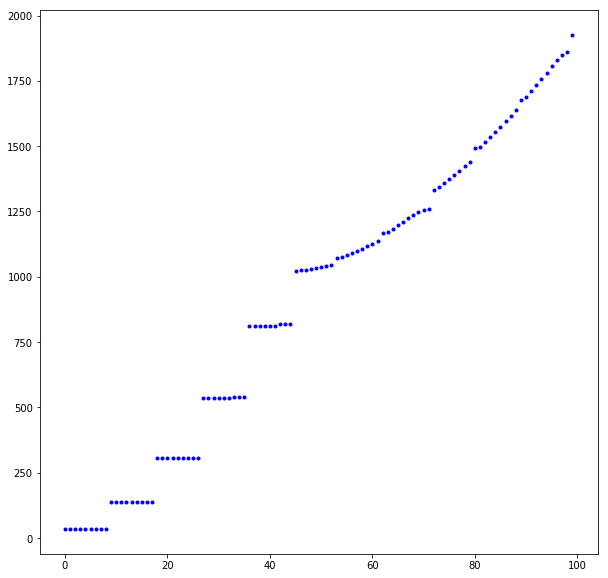

In [17]:
figure(figsize=[10,10])
#for i in range(0,30):
plot(egVals[0:100],'b.')

The energy it breaks down is approx 120 eV. This seems like a value dependant on the number of wells.

# 10

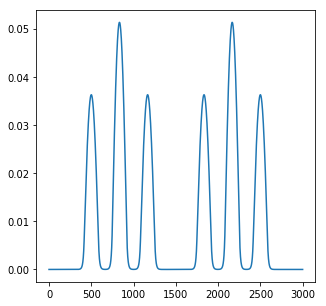

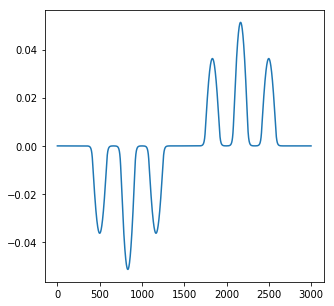

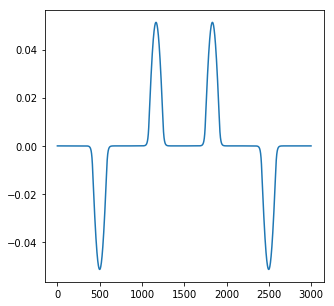

In [18]:
for i in range(0,3):
    figure(figsize=[5,5])
    plot(egVects[:,i])

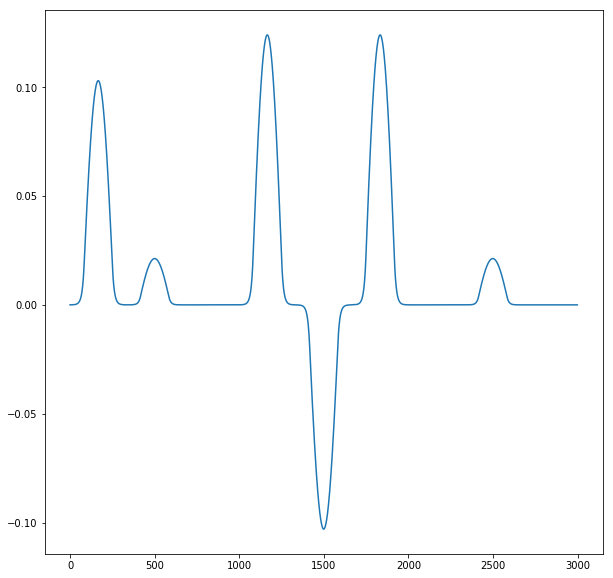

In [19]:
figure(figsize=[10,10])
sumvec = 0
for i in range(0,No,2):
    sumvec = sumvec+egVects[:,i]

plot(sumvec)

Wow! THis looks like one square well. What happens if we add ALL the odd ones though?

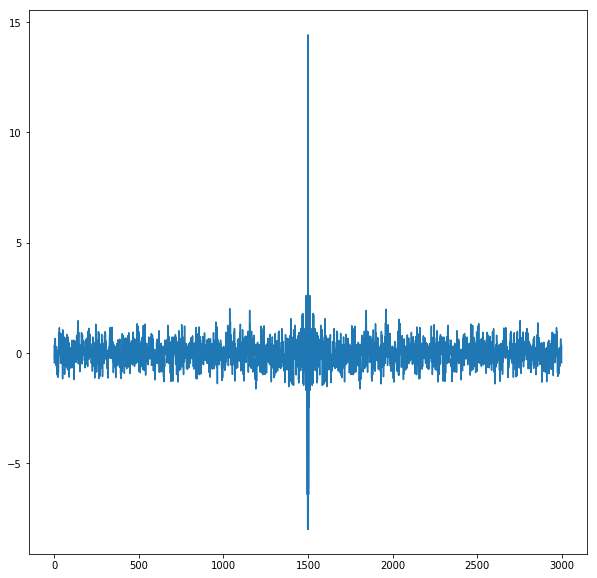

In [20]:
figure(figsize=[10,10])
sumvec = 0
for i in range(0,len(egVects),2):
    sumvec = sumvec+egVects[:,i]

plot(sumvec)

Oh no! This is very bad. Let's stick with the previous answer.

# 12

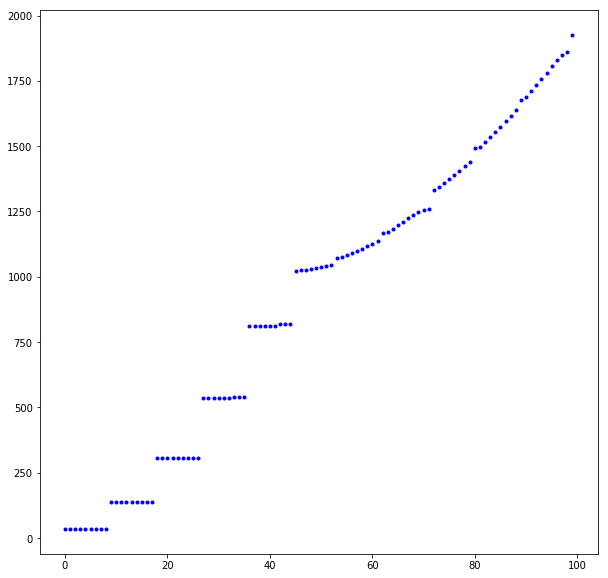

In [21]:
figure(figsize=[10,10])
#for i in range(0,30):
plot(egVals[0:100],'b.')

Woa! Okay... It's defnitely stair-step-py, with bands representing the energy levels or energy bands. Cool!

In [68]:
Nx = 1000
No = 1
Vo = 1000
L = 1.0
x = linspace(0,L,Nx)

V = 0.5*Vo*(sign(cos(2*pi*x*No/L))+1.0)

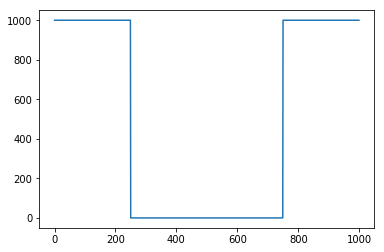

In [69]:
plot(V)

In [77]:
Nk = Nx
ks = linspace(-pi,pi,Nk)
Evals = zeros((Nk,Nx))
for j in range(0,Nk):
    k = ks[j]
    #Define H, get eigenvalues in array w
    H = zeros((Nx,Nx),dtype='complex')
    k=1
    for i in range(0,Nx):
        if i>0:
            H[i,i-1] = -(h**2)/(2.0*m*(dx**2))
        if i <Nx-1:
            H[i,i+1] = -(h**2)/(2.0*m*(dx**2))

        H[i,i] = 2.0*(h**2)/(2.0*m*(dx**2)) + V[i]
        H[0,Nx-1] = -(h**2)/(2.0*m*(dx**2))*exp(-1j*k*a)
        H[Nx-1,0] = -(h**2)/(2.0*m*(dx**2))*exp(1j*k*a)
    egVals,egVects = eigh(H)
        
    Evals[j,:] = egVals
plot(Evals[:,:9],'b.-')
show()

KeyboardInterrupt: 

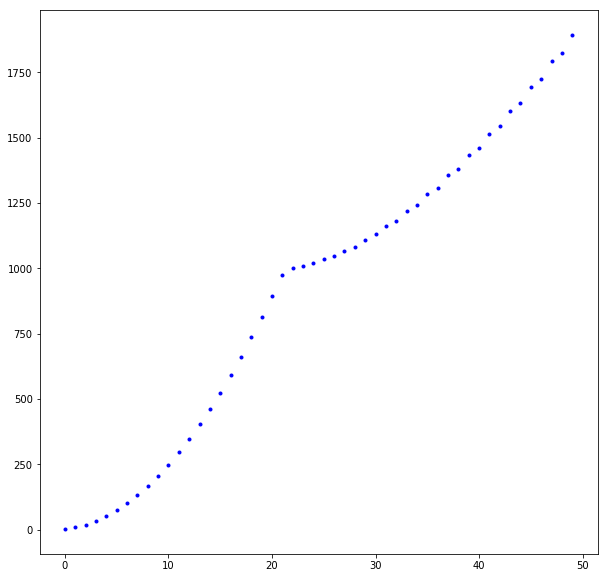

In [74]:
figure(figsize=[10,10])
#for i in range(0,30):
plot(egVals[0:50],'b.')

In [60]:
Nk = Nx
ks = linspace(-pi,pi,Nk)
Evals = zeros((Nk,Nx))
for j in range(0,Nk):
    k = ks[j]
    #Define H, get eigenvalues in array w
    egVals[j,:] = egVects
plot(egVals[:,:9], 'b-')

IndexError: too many indices for array